## Esaminare i dati

In [1]:
import pandas as pd

# Load data and investigate
data = pd.read_csv('./mushroom_data_all.csv')

In [2]:
data.describe()

,class_edible,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [3]:
# Sembra non ci siano valori mancanti e che siano tutte feature categoriche...

In [4]:
# Quante classi ci sono per ciascuna feature?
data.nunique()

class_edible                 2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64

In [5]:
# Alcune feature hanno troppe classi per una codifica one-hot (aumento della dimensionalità eccessivo, ecc...)
# Una feature (veil-type) ha lo stesso valore ripetuto ottomila e passa volte, sembra poco caratterizzante...

In [6]:
# Meglio ri-assicurarsi che non ci siano NaN o Null value (sono quel tipo di persona)
data.isnull().any()

class_edible                False
cap-shape                   False
cap-surface                 False
cap-color                   False
bruises                     False
odor                        False
gill-attachment             False
gill-spacing                False
gill-size                   False
gill-color                  False
stalk-shape                 False
stalk-root                  False
stalk-surface-above-ring    False
stalk-surface-below-ring    False
stalk-color-above-ring      False
stalk-color-below-ring      False
veil-type                   False
veil-color                  False
ring-number                 False
ring-type                   False
spore-print-color           False
population                  False
habitat                     False
dtype: bool

In [7]:
# Dare un'occhiata ai dati grezzi non guasta mai
data.head(100)

,class_edible,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,e,x,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,n,s,g
96,e,f,y,n,t,l,f,c,b,p,...,y,w,w,p,w,o,p,n,s,g
97,e,x,s,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
98,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,n,s,g


## Preprocessare

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelBinarizer
from sklearn.compose import ColumnTransformer

# Seleziona features con un numero massimo (e minimo) di valori categorici
max_unique_vals = 7 # Lucky seven :) (L'idea è di evitare una dimensionalità troppo elevata)
features = [col for col in data.columns if data[col].nunique() <= max_unique_vals and data[col].nunique() > 1]
print('Saranno usate le features: ' + ', '.join(features) + '.')

# Separa variabile target da predittori
y = data.class_edible
X = data[features]

# Codifica predittori e variabili target
onehot_encoder = OneHotEncoder(sparse=False)
label_binarizer = LabelBinarizer()
X = onehot_encoder.fit_transform(X)
y = label_binarizer.fit_transform(y)
# Nota: da qui in poi X ed y sono numpy array

# Divido in train e test set, il random_state assicura che lo split sia sempre lo stesso.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Saranno usate le features: class_edible, cap-shape, cap-surface, bruises, gill-attachment, gill-spacing, gill-size, stalk-shape, stalk-root, stalk-surface-above-ring, stalk-surface-below-ring, veil-color, ring-number, ring-type, population, habitat.


## Creazione modello

In [9]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Costruttore del modello 
# (solo per fare alcuni esperimenti con il wrapper per sklearn: poteva essere creato anche fuori dalla funzione builder)
def mushroom_model_builder():
    
    # Una semplicissima mini-rete neurale 
    inputs = keras.Input(shape=(X_train.shape[1],))
    x = layers.Dense(8, activation="relu")(inputs)
    x = layers.Dense(4, activation="relu")(x)
    outputs = layers.Dense(1, activation="sigmoid")(x)

    # Crea il modello
    model = keras.Model(inputs=inputs, outputs=outputs, name="mushrooms_model")
    
    # Compila il modello, scelta della funzione di loss per l'errore, l'ottimizzatore e la metrica osservata ad ogni epoca
    #model.compile(loss='mse', optimizer=keras.optimizers.RMSprop(), metrics=["accuracy"])
    model.compile(loss='mse', optimizer='sgd', metrics=["accuracy"])
    
    return model

model = mushroom_model_builder()

# Diamo un'occhiata va...
model.summary()

Model: "mushrooms_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 60)]              0         
_________________________________________________________________
dense (Dense)                (None, 8)                 488       
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 5         
Total params: 529
Trainable params: 529
Non-trainable params: 0
_________________________________________________________________


## Addestramento + validazione

In [10]:
# Callback che serve per fermarsi se non ci sono "grossi" miglioramenti
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=3)

# Nota: il VALIDATION SET per regolare gli iperparametri viene gestito automaticamente con validation_split=0.2
history = model.fit(X_train, y_train, batch_size=32, epochs=42, callbacks=[early_stopping], validation_split=0.2)

Train on 5199 samples, validate on 1300 samples
Epoch 1/42
5199/5199 [==============================] - ETA: 0s - loss: 0.2595 - accuracy: 0.52 - 0s 86us/sample - loss: 0.2474 - accuracy: 0.5615 - val_loss: 0.2139 - val_accuracy: 0.6938
Epoch 2/42
5199/5199 [==============================] - 0s 29us/sample - loss: 0.1943 - accuracy: 0.7998 - val_loss: 0.1800 - val_accuracy: 0.8438
Epoch 3/42
5199/5199 [==============================] - 0s 32us/sample - loss: 0.1633 - accuracy: 0.8669 - val_loss: 0.1535 - val_accuracy: 0.8808
Epoch 4/42
5199/5199 [==============================] - 0s 33us/sample - loss: 0.1396 - accuracy: 0.8990 - val_loss: 0.1333 - val_accuracy: 0.9038
Epoch 5/42
5199/5199 [==============================] - 0s 32us/sample - loss: 0.1215 - accuracy: 0.9179 - val_loss: 0.1170 - val_accuracy: 0.9192
Epoch 6/42
5199/5199 [==============================] - 0s 32us/sample - loss: 0.1062 - accuracy: 0.9329 - val_loss: 0.1020 - val_accuracy: 0.9331
Epoch 7/42
5199/5199 [======

## Verifica prestazioni sul test set

In [11]:
# Valutazione prestazioni sul test set
test_scores = model.evaluate(X_test, y_test, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

1625/1625 - 0s - loss: 0.0130 - accuracy: 1.0000
Test loss: 0.012998995833098888
Test accuracy: 1.0


## Confusion Matrix

In [12]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Utilizzo il modello per predire tutto il test set (arrotondo ad interi i risultati in modo che sia 0 o 1)
pred = model.predict(X_test).round()

# Calcolo la confusion matrix confrontando le predizioni con la ground truth
cmatrix = confusion_matrix(pred, y_test)

# Per confronto visivo ricavo il numero esatto di etichette per entrambe le categorie nella ground truth
# Non è un sistema perfetto ma le probabilità che 'azzecchi' proprio le stesse quantità sono piuttosto basse
y_test_edible_count = sum(label_binarizer.inverse_transform(y_test) == 'e')
y_test_poisonous_count = len(y_test) - y_test_edible_count


print(f'TEST SET -> Commestibili: {y_test_edible_count}, Velenosi: {y_test_poisonous_count}')
print()
print(cmatrix)

TEST SET -> Commestibili: 843, Velenosi: 782

[[843   0]
 [  0 782]]


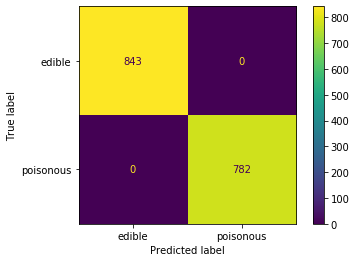

In [13]:
# Ok, qualcosa di più carino dai...
from sklearn.metrics import ConfusionMatrixDisplay

disp=ConfusionMatrixDisplay(confusion_matrix=cmatrix,
                            display_labels=['edible', 'poisonous'])


# Mostra la confusion matrix con un grafico stile heatmap
disp = disp.plot(values_format='d')
plt.show()